<h1>Vizag to model itself on San Francisco</h1>

<h3> Table of Contents:</h3>

  1. Introduction: Business Problem
  2. Data
  3. Methodology
  4. Analysis
  5. Results 
  6. Discussion and Conclusion

<h3>1. Introduction: Business Problem</h3>

This Project is Based on the article published in [Business-Standard.com](https://www.business-standard.com/article/current-affairs/intro-for-front-page-in-the-third-part-of-the-smart-cities-series-business-standard-writes-on-vishakapatnam-and-how-it-is-aiming-to-be-like-san-francisco-with-plenty-of-input-from-the-usvizag-aims-at-a-san-franciso-like-model-116061400791_1.html) on 15th June 2016. Data has been gathered to understand and explore the areas of investment for increasing the rate of development in Vizag with increased investment opportunities &nbsp; 

**Can Vizag remodel itself as San Francisco? If yes, what is the current growth rate of both the cities? How are they interrelated with respect to geography and demographics?**&nbsp;

Based on the report published by SmartCitiesCouncil India ,Fluentgrid Ltd (formerly Phoenix IT Solutions Ltd), in association with Greater Visakhapatnam Municipal Corporation (GVMC), has launched a state-of-the-art centralized City Command Center.
IBM, the Council’s lead partner in India, partnering with two other US-based organizations — AECOM and KPMG — has prepared the entire master plan for Vizag Smart City, marking a strong American role in the city’s ambitious plan.

Visakhapatnam (also known as Vizag) is the largest city and the financial capital of the Indian State of Andhra Pradesh. It is also the ninth-most populous metropolitan area in India with a population of 5,018,000. With an output of $43.5 billion, Visakhapatnam is the ninth-largest contributor to India’s overall gross domestic product as of 2016. (Wikipedia)

For the larger project where the US agencies are involved based on an event published in USTDA Blog, the government authorities have been benchmarking Vizag with San Francisco when it comes to the targeted outcomes. San Francisco was also chosen because of the geographical similarity. Situated in northern California, the city is on the tip of a peninsula, surrounded by the Pacific Ocean and a bay. San Francisco is also known for its hilly landscape, among other picturesque places. Vizag, too, has a hilly terrain, with several big formations such as Kailasagiri and Rishikonda overlooking the Bay of Bengal. [5]

As a resident of Vizag, I decided to explore the neighborhoods of Vizag, AP, India with the neighborhoods of San Francisco, US to understand the investment opportunities and the city overall growth and development at par with San Francisco using Clustering & Segmentation techniques, ML (Machine Learning). Data Visualizations (using seaborn and matplotlib in Python) are created to explore GDP, Per Capita Income, climatic conditions, tourism and educational institutions of both the cities. All these data points will help us understand the rate of growth in Visakhapatnam and scope of development in different sectors.

<h3>2. Data </h3>

Following datasets have been used in the project:
  1. Postal Codes of Visakhapatnam. Data has been scraped and cleaned from Yo!Vizag – City’s Exclusive Magazine and Portal [1] using Beautiful Soup and pandas libraries and saved in .csv format. 
  2. Foursquare API to get the most common venues of given boroughs of Visakhapatnam and San Francisco respectively.[2]
  3. Visakhapatnam [3] and San Francisco Wikipedia Pages [4] have been scraped and cleaned for creating Word clouds.
  4. Zip codes of San Francisco. Data has been downloaded in .csv format from https://datasf.org/ and cleaned using pandas.
  5. Economy of Visakhapatnam
  6. Per Capita Income of San Francisco
  7. Population data of Visakhapatnam
  8. GDP data of San Francisco

<h3>2.1 Data Gathering and Analysis</h3>

2 Cities will be analyzed in this project: Visakhapatnam and San Francisco.

<h4>Data 1</h4>

Neighborhood of Visakhapatnam has a total of 684 areas. Most notable areas of the city include urban areas like Dwaraka Nagar, Gajuwaka, Gopalapatnam, Jagadamba Centre, Maddilapalem, Madhurawada, Seethammadhara and semi-rural suburbs such as Simhachalam, Pendurthi, and Parwada. 

<h4>Data 2</h4>

SFO has total of 36 neighborhoods [4]. But due to limited data available we could analyze only 26 neighborhoods.  Data has been downloaded in .csv format from https://datasf.org/ and cleaned using pandas. Below are the 1st five neighborhoods:

<h4>Data 3</h4>

For the below analysis we will get data from Wikipedia:
    <br>1. Visakhapatnam and San Francisco City Demographics.</br>
    <br>2. Visakhapatnam Tourism and Attractions.</br>
    <br>3. San Francisco Tourism and conventions.</br>
    
<h4>Data 4</h4>

Visakhapatnam and SFO geographical coordinates will be utilized as input for Foursquare API, that will be leveraged to extract information for each neighborhood respectively. We will use the Foursquare API to explore neighborhoods in Visakhapatnam and SFO City. 

<h4>Data 5</h4>

Population, GDP, Per capita Income, Tourism, Educational Institutions  and Weather data of Vizag and San Francisco

<h3> Methodology </h3>

<h4> Analytic Approach </h4>

In this project, first part is clustering of Visakhapatnam using k means algorithm. Visakhapatnam has 648 pin codes/areas/postal codes, geocodes of only 326 locations have been included in the data analysis. We will explore the areas around central Visakhapatnam and compare it with the neighborhoods of San Francisco to understand the geographical similarities.
2nd part comprises of clustering of San Francisco. For San Francisco out of 36 neighborhoods venues of 27 neighborhoods have been explored in this project using Foursquare API.
3rd part includes data visualizations and comparison of available data of both the cities for insights to take investment decisions in Vizag. Word clouds created from the wiki pages of Vizag and SFO further add value to our discussion.

<h4> Exploratory Data Analysis: </h4>

In [26]:
from bs4 import BeautifulSoup
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from PIL import Image

Data has been scraped and cleaned from [Yo!Vizag – City’s Exclusive Magazine and Portal](https://www.yovizag.com/visakhapatnam-vizag-pin-code/) – using Beautiful Soup and pandas libraries and saved in .csv format.

In [27]:
r = requests.get('https://www.yovizag.com/visakhapatnam-vizag-pin-code/')
soup = BeautifulSoup(r.text,'html.parser')
Main = soup.find('table')
table = Main.find_all('td')

Location = []
Pincode = []
City = []
State=[]

for i in range(0, len(table), 4):
    Location.append(table[i].text.strip())
    Pincode.append(table[i+1].text.strip())
    State.append(table[i+2].text.strip())
    City.append(table[i+3].text.strip())
            
df = pd.DataFrame(data=[Location, Pincode, City, State]).transpose()
df.columns = ['Location', 'Pincode', 'City', 'State']
df['Location'].replace('Andhra Pradesh', np.nan, inplace= True)
df.dropna(subset=['Location'],inplace =True)
df.drop(df.index[0:2],inplace = True)
df = df.reset_index(drop=True)
df.to_csv('Vizag_Pincodes.csv',index=False, encoding='utf-8')

 Below are the 1st five areas: 

In [28]:
df = pd.read_csv('Vizag_Pincodes.csv')
df.head()

,Location,Pincode,City,State
0,A Kothapalle,531022,Visakhapatnam,Andhra Pradesh
1,A U engg college,530003,Visakhapatnam,Andhra Pradesh
2,A Veeranarayanam,531027,Visakhapatnam,Andhra Pradesh
3,Adakula,531115,Visakhapatnam,Andhra Pradesh
4,Addumanda,531077,Visakhapatnam,Andhra Pradesh


Let's Visualize the map of Visakhapatnam : 

In [29]:
geolocator = Nominatim(timeout=10, user_agent = "Explore_Vizag")
location = geolocator.geocode('Visakhapatnam,Andhra Pradesh')
location


Location(Visakhapatnam, Andhra Pradesh, 530001, India, (17.7231276, 83.3012842, 0.0))

In [30]:
mapa = folium.Map(location=(17.781783, 83.370876), zoom_start=9)
display(mapa)

In [31]:
#geocodes = [geolocator.geocode(', '.join([df['Location'][i], df['City'][i],df['State'][i]]))for i in range(len(df))]
#geocodes

[None,
 None,
 None,
 None,
 None,
 Location(Adduru, Visakhapatnam, Andhra Pradesh, India, (18.2114664, 82.5355305, 0.0)),
 None,
 None,
 Location(Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India, (17.6860122, 83.1354763, 0.0)),
 Location(Visakhapatnam International Airport, NH16, Kakani Nagar, Jaggayyapalem, Visakhapatnam, Andhra Pradesh, 530001, India, (17.7218419, 83.2354337230703, 0.0)),
 Location(Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India, (17.7274872, 83.2990879, 0.0)),
 Location(Alamanda, Visakhapatnam, Andhra Pradesh, India, (17.931495, 83.003157, 0.0)),
 Location(Amalapuram, Visakhapatnam, Andhra Pradesh, India, (17.5853229, 82.5908776, 0.0)),
 None,
 None,
 Location(Ammulapalem, Visakhapatnam, Andhra Pradesh, India, (17.7596079, 83.0717667, 0.0)),
 None,
 Location(Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India, (17.68897, 83.003476, 0.0)),
 None,
 Location(Anakapalle, Anakapalle - Pudimadaka Road, Ana

In [32]:
res = [] 
for val in geocodes: 
    if val != None : 
        res.append(val) 


res
df_ = pd.DataFrame()
df_['Latitude'] = [g.latitude for g in res]
df_['Longitude'] = [g.longitude for g in res]
df_['Neighborhood'] = [g.address for g in res]
df_.to_csv('Vizag_Longlat.csv', index=False, encoding='utf-8')

In [74]:
df_ = pd.read_csv('Vizag_Longlat.csv')
df_.head()

,Latitude,Longitude,Neighborhood
0,18.211466,82.535531,"Adduru, Visakhapatnam, Andhra Pradesh, India"
1,17.686012,83.135476,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530..."
2,17.721842,83.235434,"Visakhapatnam International Airport, NH16, Kak..."
3,17.727487,83.299088,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva..."
4,17.931495,83.003157,"Alamanda, Visakhapatnam, Andhra Pradesh, India"


Let's visualize the data we have so far: city center location and candidate neighborhood centers:

In [34]:
# create map of Vizag using latitude and longitude values
latitude = 17.7231276 
longitude = 83.3012842
map_Vizag = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_['Latitude'], df_['Longitude'], df_['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_Vizag)  
    
map_Vizag.save('Vizag_Map.html')


<h4>Foursquare</h4>

Now that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood.
Let’s explore venues around Andhra University, one of the most prestigious and oldest university in Andhra Pradesh located in central Vizag. We selected this location as Andhra University is located on the uplands of Visakhapatnam, the university campus is scenic, with the Bay of Bengal on one side of it and on the other, the green Kailasagiri hill range. This location is apt for our analysis as San Francisco was also chosen because of the geographical similarity.  

Foursquare credentials are defined in hidden cell bellow.

In [35]:
CLIENT_ID = 'RNSVXDE5FXAPD3PHINMXOERS4Y4NZYBWZQHON001PULMWAHD' # your Foursquare ID
CLIENT_SECRET = 'G2FI1LJNV0HJTBCYDW1TIILFBWOVIUYXORPLIH04B3MHNZBX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RNSVXDE5FXAPD3PHINMXOERS4Y4NZYBWZQHON001PULMWAHD
CLIENT_SECRET:G2FI1LJNV0HJTBCYDW1TIILFBWOVIUYXORPLIH04B3MHNZBX


In [36]:
df_.loc[10,'Neighborhood']

'Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India'

In [37]:
neighborhood_latitude = df_.loc[10,'Latitude']
neighborhood_longitude = df_.loc[10,'Longitude']
neighborhood_name = df_.loc[10,'Neighborhood']

print('Longitude and Latitude  values of {} are {},{}.'.format(neighborhood_name,neighborhood_latitude,neighborhood_longitude))

Longitude and Latitude  values of Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India are 17.7376312,83.3300513027767.


In [38]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cd885e21ed2196c3f7491ac'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Vizag',
  'headerFullLocation': 'Vizag',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 17.742131204500005,
    'lng': 83.3347670860921},
   'sw': {'lat': 17.733131195499993, 'lng': 83.32533551946129}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '514c807ee4b00b0ee5686d8d',
       'name': 'my restaurant',
       'location': {'address': 'Iskathota',
        'lat': 17.739535630924795,
        'lng': 83.32688247020218,
        'labeledLatLngs': [{'label': 'display',
          'lat': 17.73

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,my restaurant,Indian Restaurant,17.739536,83.326882
1,Fring,Indian Restaurant,17.741645,83.331995


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we repeat the same steps for all the neighborhoods around Andhra university to get the most common venue categories. 

In [44]:
Vizag_venues = getNearbyVenues(names=df_['Neighborhood'],
                                   latitudes=df_['Latitude'],
                                   longitudes=df_['Longitude']
                                  )

Adduru, Visakhapatnam, Andhra Pradesh, India
Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India
Visakhapatnam International Airport, NH16, Kakani Nagar, Jaggayyapalem, Visakhapatnam, Andhra Pradesh, 530001, India
Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India
Alamanda, Visakhapatnam, Andhra Pradesh, India
Amalapuram, Visakhapatnam, Andhra Pradesh, India
Ammulapalem, Visakhapatnam, Andhra Pradesh, India
Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India
Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India
Anandapuram, Visakhapatnam, Andhra Pradesh, India
Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India
Annavaram, Visakhapatnam, Andhra Pradesh, India
Aradakota, Visakhapatnam, Andhra Pradesh, India
Araku, Visakhapatnam, Andhra Pradesh, India
Arilova, Visakhapatnam, Andhra Pradesh, 530001, India
Aripaka, Visakhapatnam, And

Snap shot of first 5 neighborhoods and their venue categories.

In [45]:
print(Vizag_venues.shape)
Vizag_venues.head()

(80, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,aganampudi panchayat office,17.689123,83.135063,Warehouse Store
1,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,Apollo Pharmacy,17.688081,83.131680,Pharmacy
2,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Sai Ram Parlour,17.726339,83.303465,Indian Restaurant
3,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Sangam Sarat Theatre,17.725508,83.302463,Indie Movie Theater
4,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Tandoori Inn Restaurent,17.727051,83.302709,Indian Restaurant


In [46]:
Vizag_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India",2,2,2,2,2,2
"Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India",5,5,5,5,5,5
"Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India",3,3,3,3,3,3
"Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India",4,4,4,4,4,4
"Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India",2,2,2,2,2,2
"Arilova, Visakhapatnam, Andhra Pradesh, 530001, India",2,2,2,2,2,2
"Bheemunipatnam, Visakhapatnam, Andhra Pradesh, 531163, India",3,3,3,3,3,3
"Chengala Rao Peta, MTC Palem, Visakhapatnam, Andhra Pradesh, 530001, India",3,3,3,3,3,3
"Chittivalasa, Visakhapatnam, Andhra Pradesh, 531162, India",2,2,2,2,2,2


In [47]:
print('There are {} unique categories of venues in Andhra University'.format(len(Vizag_venues['Venue Category'].unique())))

There are 39 unique categories of venues in Andhra University


In [48]:
# one hot encoding
Vizag_onehot = pd.get_dummies(Vizag_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Vizag_onehot['Neighborhood'] = Vizag_venues['Neighborhood'] 


# move neighborhood column to the first column

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

Vizag_onehot = change_column_order(Vizag_onehot,'Neighborhood',0)

Vizag_onehot.head()


,Neighborhood,ATM,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Beach,Boat or Ferry,Bookstore,...,Pet Service,Pharmacy,Platform,Resort,Restaurant,Shopping Mall,Smoke Shop,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Vizag_grouped = Vizag_onehot.groupby('Neighborhood').mean().reset_index()
Vizag_grouped

,Neighborhood,ATM,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Beach,Boat or Ferry,Bookstore,...,Pet Service,Pharmacy,Platform,Resort,Restaurant,Shopping Mall,Smoke Shop,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.5
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.2,0.0
2,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.666667,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
3,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.750000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
4,"Andhra University, Sivajipalem Road, Sector 4,...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.5,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.000,...,0.0,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.0,0.0,0.0
7,"Chengala Rao Peta, MTC Palem, Visakhapatnam, A...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
8,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
9,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0


In [50]:
Vizag_grouped.shape

(31, 40)

Now we repeat the same for all the neighborhoods in Visakhapatnam city. Let’s look at neighborhoods with the top 5 most common venues to get an idea.

In [51]:
num_top_venues = 5

for hood in Vizag_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vizag_grouped[Vizag_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India----
                           venue  freq
0                Warehouse Store   0.5
1                       Pharmacy   0.5
2  Vegetarian / Vegan Restaurant   0.0
3                           Park   0.0
4            Indie Movie Theater   0.0


----Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India----
                           venue  freq
0              Indian Restaurant   0.4
1  Vegetarian / Vegan Restaurant   0.2
2            Indie Movie Theater   0.2
3                           Park   0.2
4                    Pet Service   0.0


----Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India----
                 venue  freq
0             Pharmacy  0.67
1  Indie Movie Theater  0.33
2          Pet Service  0.00
3  Japanese Restaurant  0.00
4    Mobile Phone Shop  0.00


----Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India----
      

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vizag_grouped['Neighborhood']

for ind in np.arange(Vizag_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vizag_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


Now we run the k-means algorithm to cluster the neighborhoods into 4 clusters. The no. of clusters is decided by using Elbow method for optimal k. In our scenario the optimal no. of k Is 4. 

In [54]:
# set number of clusters
kclusters = 4

Vizag_grouped_clustering = Vizag_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vizag_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 0, 1, 1, 2])

In [55]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.to_numeric(neighborhoods_venues_sorted['Cluster Labels'])
Vizag_merged = df_.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Vizag_merged = Vizag_merged.dropna()
Vizag_merged = Vizag_merged.reset_index(drop=True)
cols = ['Neighborhood','Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']
Vizag_merged = Vizag_merged[cols]
Vizag_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,0.0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,1.0,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",17.688970,83.003476,0.0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",17.686163,83.002393,0.0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",17.737631,83.330051,1.0,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",17.767525,83.313898,0.0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",17.891381,83.451218,1.0,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",17.933279,83.427611,0.0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",17.829679,82.934484,0.0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
9,"Dayalnagar Study Centre, Dayalbagh Educational...",17.754359,83.346887,1.0,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant


In [56]:
Vizag_merged['Cluster Labels'] = Vizag_merged['Cluster Labels'].apply(np.int32)
Vizag_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,1,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",17.688970,83.003476,0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",17.686163,83.002393,0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",17.737631,83.330051,1,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",17.767525,83.313898,0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",17.891381,83.451218,1,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",17.933279,83.427611,0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",17.829679,82.934484,0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
9,"Dayalnagar Study Centre, Dayalbagh Educational...",17.754359,83.346887,1,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant


In [57]:
new_table = pd.DataFrame()
new_table['Cluster Labels'] = Vizag_merged['Cluster Labels']
new_table['10th Most Common Venue'] = Vizag_merged['10th Most Common Venue']
new_table

,Cluster Labels,10th Most Common Venue
0,0,Clothing Store
1,1,Clothing Store
2,0,Clothing Store
3,0,Clothing Store
4,1,Clothing Store
5,0,Clothing Store
6,1,Comfort Food Restaurant
7,0,Breakfast Spot
8,0,Clothing Store
9,1,Comfort Food Restaurant


In [58]:
table = pd.pivot_table(new_table,index='Cluster Labels',columns=['10th Most Common Venue'],aggfunc={'10th Most Common Venue':'count'},fill_value=0)
table.columns

MultiIndex(levels=[['10th Most Common Venue'], ['Bookstore', 'Breakfast Spot', 'Clothing Store', 'Comfort Food Restaurant', 'Cricket Ground']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, '10th Most Common Venue'])

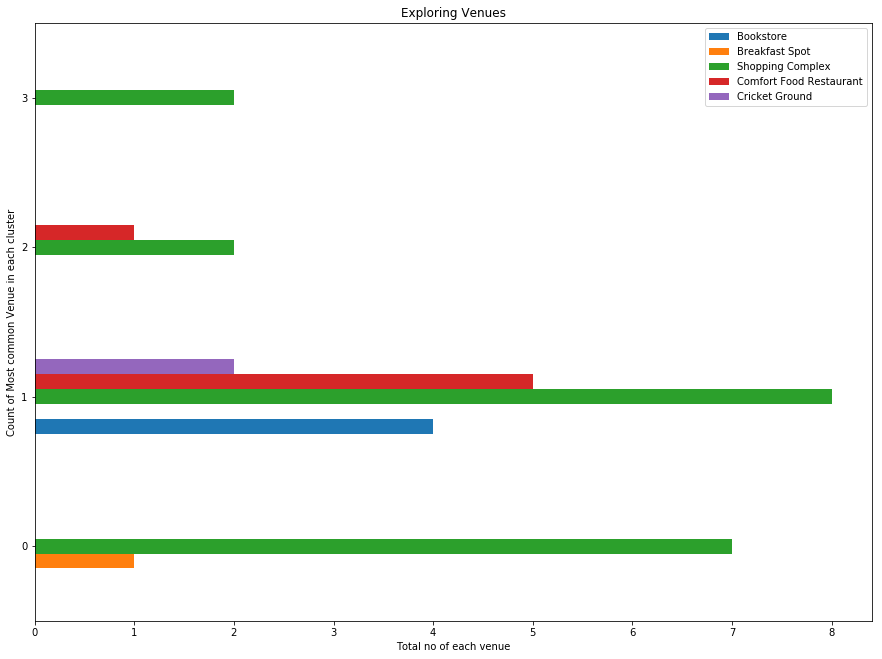

In [59]:
table.plot(kind='barh',figsize=(15,11),align='center')
plt.ylabel('Count of Most common Venue in each cluster')
plt.xlabel('Total no of each venue')
plt.title('Exploring Venues')
plt.gca().legend(('Bookstore', 'Breakfast Spot', 'Shopping Complex', 'Comfort Food Restaurant', 'Cricket Ground'))
plt.show() 

Above horizontal Bar Chart shows the count of most common venues in each cluster. Based on the analysis, we can clearly see the presence of clothing Store/Shopping complex in every cluster which shows the amount of urbanization and development throughout every neighborhood of Visakhapatnam. Breakfast spots, food restaurants are other common venues in cluster 1 and 2. 

Clustering and segmentation of Visakhapatnam using k means algorithm –

In [60]:
latitude = 17.6868
longitude = 83.2185
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vizag_merged['Latitude'], Vizag_merged['Longitude'], Vizag_merged['Neighborhood'], Vizag_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('map_clusters3.html')

In [61]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 0, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
14,"Jaggayyapalem, Sathyavanipalem, Visakhapatnam,...",0,Shopping Mall,Pharmacy,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
25,"Vepagunta, Visakhapatnam, Andhra Pradesh, 5300...",0,ATM,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


In [62]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 1, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",1,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",1,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",1,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
9,"Dayalnagar Study Centre, Dayalbagh Educational...",1,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant
10,"Duvvada, Kurmannapalem Road, Visweswara Nagar,...",1,Train Station,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
11,"RRV Puram, Jaggayyapalem, Prahaladapuram, Visa...",1,Smoke Shop,Shopping Mall,Bakery,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
12,"Gajuwaka, Visakhapatnam, Andhra Pradesh, 53000...",1,Gym,Boat or Ferry,Clothing Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
15,"Kasimkota, Visakhapatnam, Andhra Pradesh, 5310...",1,ATM,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Bookstore
16,"Lankelapalem, Visakhapatnam, Andhra Pradesh, 5...",1,Basketball Stadium,Platform,Comfort Food Restaurant,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground
18,"Payakaraopeta, Visakhapatnam, Andhra Pradesh, ...",1,Motorcycle Shop,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


Cluster 1 has the maximum no. of venues and development. We can see the presence of Historic sites, harbor, fish markets and beach which gives us some idea on the geographical similarity between Vizag and SFO. Let's Explore population increase in the city over last 5 years.

In [63]:
df_Pop = pd.read_csv('Population_data.csv')
df_Pop = df_Pop.drop(columns=[ 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'])
df_Pop=df_Pop.set_index('Years')

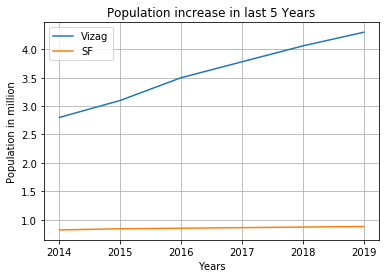

In [64]:
fig, ax = plt.subplots()
ax.plot(df_Pop)
ax.set(xlabel='Years', ylabel='Population in million',
       title='Population increase in last 5 Years')
ax.grid('on')
labels=['Vizag','SF']
ax.legend(labels=labels)
plt.show()

We further explored tourism data in word clouds shown in the notebooks :[Vizag tourism word cloud](http://localhost:8888/notebooks/Vizag%20Tourism%20word%20cloud.ipynb) and [SF Tourism Word Cloud](http://localhost:8888/notebooks/SFO%20Tourism%20word%20cloud.ipynb)

Word clouds signify the similarity in the two cities Museum, Park and Beach/Bay being the most common among them. Some other already existing natural tourist spots adding to the beauty of the city are waterfalls, caves, hills, wildlife and temples in Visakhapatnam. 
But when we closely observe the word cloud of tourism of San Francisco, there are several untapped opportunities like Fisherman’s wharf, Pier 39, Twin Peaks, Big Bus Hop on Hop off tour etc. that can be implemented in Visakhapatnam due to similar geographical features and weather conditions.  

Box plot of weather conditions of Visakhapatnam and San Francisco in a Year:

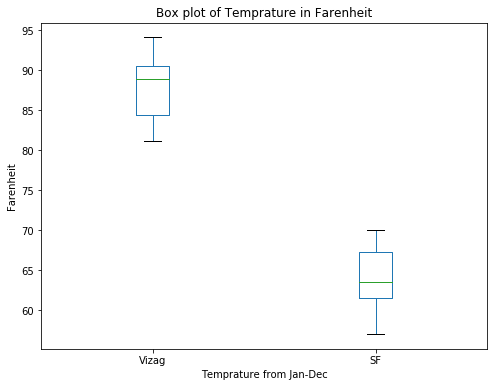

In [65]:
df_Vizag = pd.read_csv('Vizag_temp_data.csv')
df_Vizag = df_Vizag.drop(columns = ['Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'])
df_Vizag.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Temprature in Farenheit') 
plt.ylabel('Farenheit')
plt.xlabel('Temprature from Jan-Dec')
plt.show()

The hot and humid conditions of Visakhapatnam as compared to San Francisco clearly show huge scope for establishment of amusement water parks and recreational activities. Cruises, Sailing, Hiking trails and Water tours can create major spike in tourism and boost GDP of Visakhapatnam.

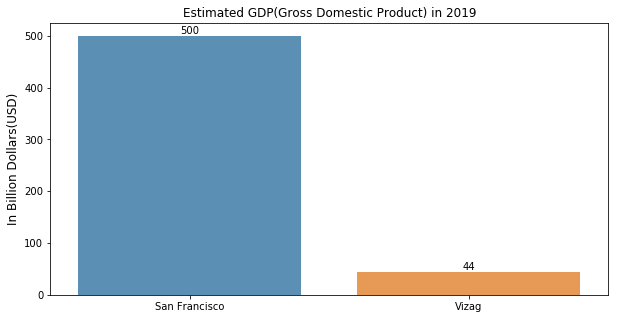

In [66]:
data = {'GDP':{'Vizag':'44','San Francisco':'500'}}
df_GDP = pd.DataFrame(data)
df_GDP=df_GDP.transpose()

plt.figure(figsize=(10,5))
sns.barplot(data=df_GDP, alpha=0.8)
plt.title('Estimated GDP(Gross Domestic Product) in 2019')
plt.ylabel('In Billion Dollars(USD)', fontsize=12)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')

plt.show()


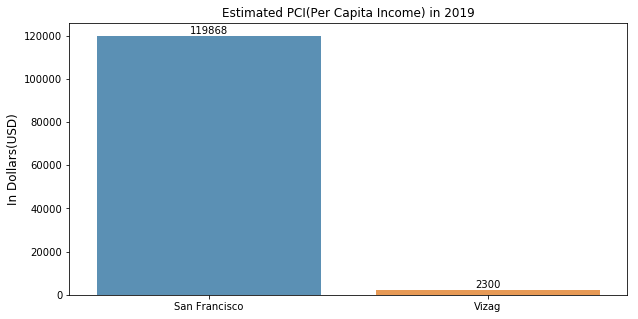

In [67]:
data = {'PCI':{'Vizag':'2300','San Francisco':'119868'}}
df_PCI = pd.DataFrame(data)
df_PCI=df_PCI.transpose()

plt.figure(figsize=(10,5))
sns.barplot(data=df_PCI, alpha=0.8)
plt.title('Estimated PCI(Per Capita Income) in 2019')
plt.ylabel('In Dollars(USD)', fontsize=12)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')

plt.show()

Though there is a significant difference in the GDP and Per Capita Income of Vizag and San Francisco, Visakhapatnam has managed to top the charts of urban population amongst all the 13 districts in Andhra Pradesh, India. According to data uploaded onto the CM’s Dashboard, the 2011 Census of India states that Visakhapatnam stood first in the state with 47.45% of urban populace. 
The difference in GDP and Per Capita Income of the two cities signify the importance of technology and investments required for the city to remodel itself as San Francisco in the next 10 years.[1] Achieving the vision will require a “Smart City” approach to regional development and infrastructure planning and delivery. For further information please refer the below link – https://www.smartvizag.in/index.php/projects/ 

To Summarize, we created word cloud using seaborn libraries and web scraping Wikipedia page of Visakhapatnam  using beautiful soup.

In [68]:
r = requests.get('https://en.wikipedia.org/wiki/Economy_of_Visakhapatnam')
soup = BeautifulSoup(r.text,'html.parser')
results = soup.find_all('p')
records = []
for result in results:
    records.append(result.text.strip('\n'))
#print(str(records))
str1 = ''.join(records)

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
Vizag_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Vizag_wc.generate(str1)

In [69]:
Vizag_mask = np.array(Image.open('vishakapatnam_mandal_map.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


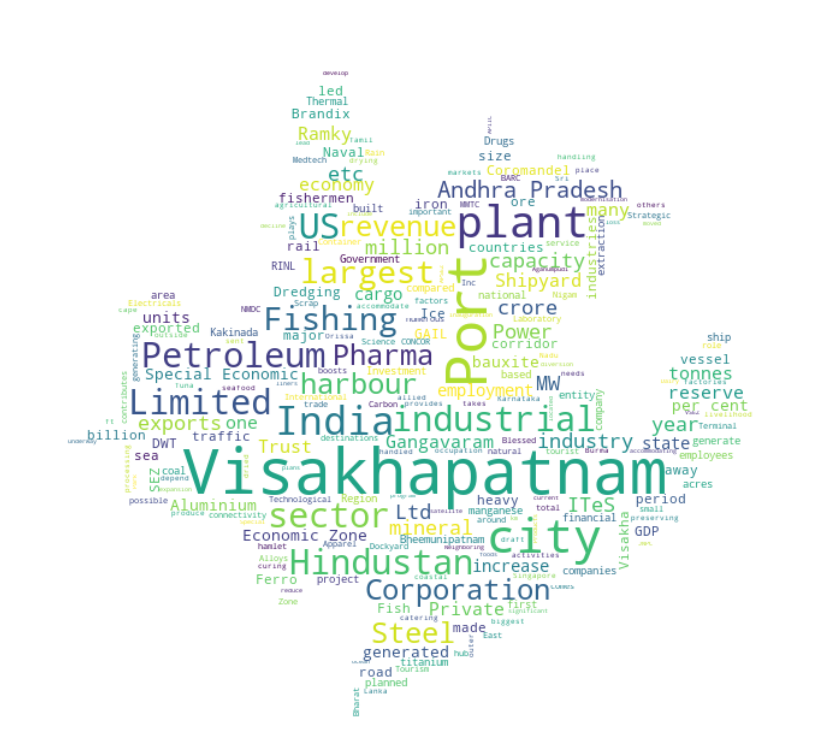

In [70]:
# instantiate a word cloud object
Vizag_wc = WordCloud(background_color='white', max_words=2000, mask=Vizag_mask, stopwords=stopwords)

# generate the word cloud
Vizag_wc.generate(str1)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(Vizag_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In this word cloud we can clearly see that Visakhapatnam has a coast, port, harbour,steel plant, railway, naval base, university, stadium,industrial area and is a metropolitan city with historic sites and international airport. 

With this information we move on to the analysis of San Francisco and identify potential ideas for development.To decrease the size of the notebook,seperate links have been included. Similar clustering of neighborhoods has been done in the notebook : [Clustering and Segmentation of San Francisco](http://localhost:8888/notebooks/SFO%20Neighborhoods.ipynb). and word clouds have been created for the [Wikipedia page of SF](http://localhost:8888/notebooks/SFO%20Word%20Cloud.ipynb) and [Educational institutions of San Francisco](http://localhost:8888/notebooks/Educational%20institutions%20SAn%20Francisco.ipynb) 

Despite its limited geographical space, San Francisco, California is home to a multitude of colleges and universities. San Francisco Conservatory of Music, San Francisco School of Digital Filmmaking, San Francisco Art Institute and Art Institute of California – San Francisco, a private campus which focuses on video game and design-based education (interior, fashion etc.) are some of the unique colleges and universities which can be further explored and established in Visakhapatnam. 

<h3>4. Results</h3>

Though we could show limited results in demographic and geographical factors from the given data set in the clustering and segmentation of the two cities and word clouds of the Wikipedia pages of Visakhapatnam and San Francisco, but we could bring out some business ideas on the new venue categories like dance studios, juice bars, coffee shops, event spaces and wide range of restaurants like sushi restaurant, Mediterranean restaurant etc. which can be tailored based on the priorities and interests of local population in Visakhapatnam.  Tourism when developed in right way with advanced technologies and FDI can play major role boosting city’s economy to remodel itself as San Francisco in near future. Educational Institutions form one more area of potential development.

<h3>5. Discussion and Conclusion: </h3>

1. Tourism has huge potential of development as a part of Smart city initiatives in Vizag. Cruises, Sailing, Hiking trails and Water tours can create major spike in tourism and boost GDP of Visakhapatnam.
2. Educational Institutions data can be explored further.
3. Business investor looking for real estate investment can further explore areas/neighborhoods in cluster 1 of Visakhapatnam as these are the areas having the highest development with restaurants, breakfast spots, shopping complex etc. as compared to the places in other clusters.
4. For people interested in coming up with startup ideas in the food sector of smart city – dance studios, juice bars, coffee shops, event spaces and wide range of restaurants like sushi restaurant, Mediterranean restaurant etc. are some of the new business ideas that can be experimented with based on further data analysis.
5. Individual investors looking for investment in residential plots can further explore areas in cluster 0 and cluster 2 of Visakhapatnam.

<h3> References: </h3>  

 <br>[1]. [Yo!Vizag – City’s Exclusive Magazine and Portal](https://www.yovizag.com/visakhapatnam-vizag-pin-code/)</br>
 <br>[2]. [Foursquare API](https://developer.foursquare.com/)</br>
 <br>[3]. [Visakhapatnam Wikipedia page](https://en.wikipedia.org/wiki/Visakhapatnam) </br>
 <br>[4] [San Francisco Wikipedia Page](https://en.wikipedia.org/wiki/San_Francisco) </br>
 <br>[5] (https://india.smartcitiescouncil.com/article/vizag-smart-city-model-itself-san-francisco) </br>
 <br>[6] (https://www.smartvizag.in/) </br>
 <br>[7] (http://apedb.gov.in/about-visakhapatnam-district.html) </br>
 <br>[8] (https://www.opendatanetwork.com) </br>